In [1]:
import os 
import warnings

warnings.filterwarnings("ignore")
os.chdir("/Users/erjo3868/repos/hypedsearch/hypedsearch")
print(f"cwd = {os.getcwd()}")

cwd = /Users/erjo3868/repos/hypedsearch/hypedsearch


In [2]:
from src.erik import parse_mzml
from src.erik_constants import SPECTRA_DIR, samples
from src.erik_utils import pydantic_models_to_df


# Read MZML data
mzml_data = []
for sample in samples:
    print(f"Sample = {sample}")
    mzml_path = SPECTRA_DIR / f"{sample}.mzML"
    spectra = parse_mzml(mzml_path=mzml_path)
    mzml_data.extend(list(spectra))
df = pydantic_models_to_df(models=mzml_data)
df.head(2)

Sample = BMEM_AspN_Fxn4
Sample = BMEM_AspN_Fxn5
Sample = BMEM_AspN_Fxn6
Sample = BMEM_AspN_Fxn7
Sample = BMEM_AspN_Fxn8
Sample = BMEM_AspN_Fxn9


AttributeError: 'Spectrum' object has no attribute 'model_dump'

Counter({2: 11796,
         3: 8361,
         4: 2807,
         5: 1258,
         6: 574,
         7: 282,
         8: 126,
         9: 65,
         10: 14})

Total num spectra = 25283
Num unique precursor masses = 14400
Proportion of spectra with unique precursor masses = 0.5695526638452715



Text(0.5, 0.98, "Precursor m/z's and masses")

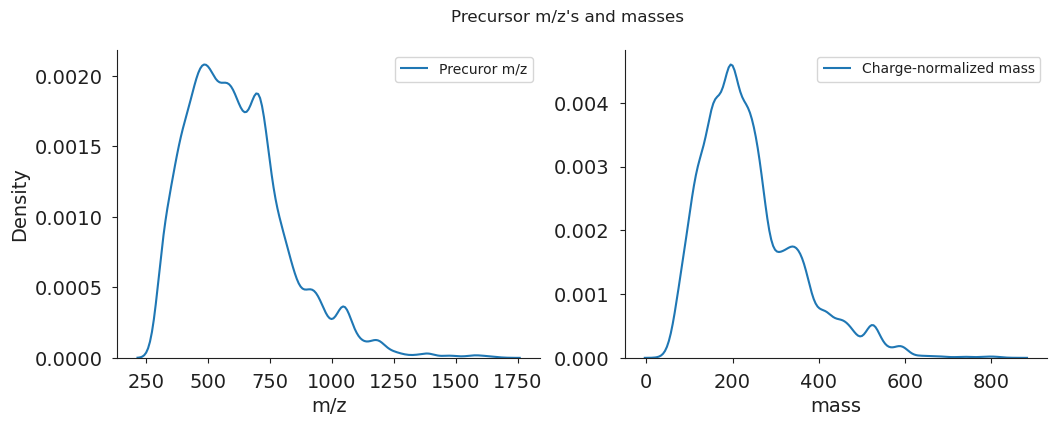

In [ ]:
from typing import Counter

import numpy as np
from src.plot_utils import fig_setup, finalize, set_title_axes_labels
import seaborn as sns
import matplotlib.pyplot as plt


PC = "precursor_charge"
PM = "precursor_mz"


# Analyze observed precursor charges
Counter(df[PC])

# Look at precursor masses with and without charge normalization
uniq_masses = np.unique(df[PM])
prop_uniq = len(uniq_masses) / df.shape[0] 
print(
    f"Total num spectra = {df.shape[0]}\n"
    f"Num unique precursor masses = {len(uniq_masses)}\n"
    f"Proportion of spectra with unique precursor masses = {prop_uniq}\n"
)

fig, axs = fig_setup(1, 2)
_=sns.kdeplot({"Precuror m/z": df[PM]}, ax=axs[0])
_=sns.kdeplot({"Charge-normalized mass": df[PM]/df[PC]}, ax=axs[1])
set_title_axes_labels(axs[0], xlabel="m/z", ylabel="Density")
set_title_axes_labels(axs[1], xlabel="mass")
finalize(axs, ignoreLegend=True)
_=fig.suptitle("Precursor m/z's and masses")
plt.show()

# 

# 